In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, random_split
import torchvision.transforms as transforms
import torch.nn.functional as F
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary

In [3]:
#torch function
transform=transforms.ToTensor()
mnist_train=torchvision.datasets.MNIST(root='/Users/isabelleliu/Desktop/code practice',train=True, download=False, transform=transform)
mnist_test=torchvision.datasets.MNIST(root='/Users/isabelleliu/Desktop/code practice',train=False, download=False, transform=transform)

#split train into train and validation
train_set, val_set=random_split(mnist_train,[len(mnist_train)-10000,10000])
batch_size=64

#create dataloader use default function
train_loader=DataLoader(train_set,batch_size,shuffle=True)
val_loader=DataLoader(val_set,batch_size,shuffle=True)
test_loader=DataLoader(mnist_test,batch_size,shuffle=True)

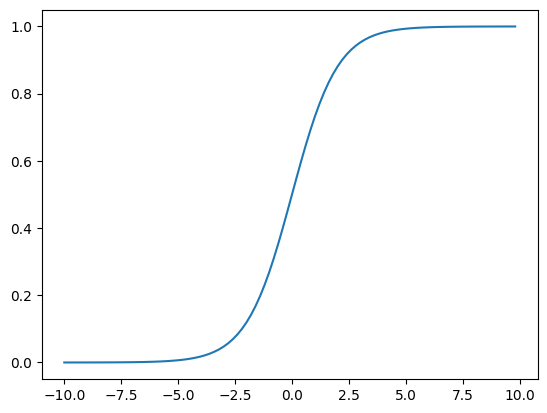

In [4]:
def sigmoid(x):
    s=1/(1+np.exp(-x))
    return s

x=np.arange(-10,10,0.2)
y=sigmoid(x)
plt.plot(x,y)
plt.show()

The Sigmoid function, also known as the logistic function, is a widely used activation function in machine learning, particularly in the context of neural networks and logistic regression. The Sigmoid function is defined as:

```
S(x) = 1 / (1 + exp(-x))
```

where `x` is the input value and `exp(x)` is the exponential function `e^x`.

The Sigmoid function has some notable properties that make it useful in machine learning:

1. **Smooth and continuous**: The Sigmoid function is a smooth and continuous function, which makes it amenable to gradient-based optimization algorithms, such as stochastic gradient descent.

2. **Output range**: The Sigmoid function maps any real-valued input to the range `(0, 1)`. This characteristic is useful when modeling probabilities, as it ensures the output will be within the bounds of a valid probability.

3. **Non-linear**: The Sigmoid function is non-linear, which allows neural networks to learn complex, non-linear relationships between inputs and outputs.

4. **Easily differentiable**: The derivative of the Sigmoid function can be easily calculated using the output of the function itself:

```
S'(x) = S(x) * (1 - S(x))
```

This property simplifies the backpropagation algorithm used to train neural networks.

However, the Sigmoid function also has some drawbacks, such as the vanishing gradient problem, which occurs when the input values are too large or too small, causing the gradient to become very close to zero. This can lead to slow convergence or stagnation during training. Despite these drawbacks, the Sigmoid function remains an important activation function in the field of machine learning.

In [7]:
class MNIST(nn.Module):
    def __init__(self):
        super(MNIST, self).__init__()

        self.fc1=nn.Linear(in_features=784, out_features=10)
        self.fc2=nn.Linear(in_features=10,out_features=10)
        self.fc3=nn.Linear(in_features=10,out_features=1)

    def forward(self,inputs):
        inputs=inputs.reshape(inputs.shape[0], 784)
        output1=self.fc1(inputs)
        output1=F.sigmoid(output1)
        output2=self.fc2(output1)
        output2=F.sigmoid(output2)
        finals=self.fc3(output2)

        return finals



In [8]:
model=MNIST()
param_info=summary(model,(1,1,28,28))
print(param_info)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]           7,850
            Linear-2                   [-1, 10]             110
            Linear-3                    [-1, 1]              11
Total params: 7,971
Trainable params: 7,971
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03
----------------------------------------------------------------
None


In [32]:
def train(model):
    model.train()

    optimizer=torch.optim.SGD(model.parameters(), lr=0.01)

    epoch_num=10
    loss_list=[]

    for epoch in range(epoch_num):
        for batch, data in enumerate(train_loader):
            images,labels=data
            labels=labels.float()
            predicts=model(images)
            loss=F.mse_loss(predicts,labels.unsqueeze(-1))
            avg_loss=torch.mean(loss)

            if batch%200==0:
                loss_list.append(avg_loss.item())
                print("epoch: {}, batch: {}, loss is: {}".format(epoch,batch,avg_loss))

            avg_loss.backward()
            optimizer.step()
            optimizer.zero_grad()
    torch.save(model.state_dict(),'ministsigmoid.pth')
    return loss_list


In [33]:
model=MNIST()
loss_list = train(model)

/var/folders/rz/cvwxv_893p7cj9rn8qdyqxlc0000gn/T/ipykernel_42617/2610142931.py:14: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss=F.mse_loss(predicts,labels.unsqueeze(-1))


epoch: 0, batch: 0, loss is: 29.79634666442871
epoch: 0, batch: 200, loss is: 8.446473121643066
epoch: 0, batch: 400, loss is: 7.170001983642578
epoch: 0, batch: 600, loss is: 5.211594581604004


/var/folders/rz/cvwxv_893p7cj9rn8qdyqxlc0000gn/T/ipykernel_42617/2610142931.py:14: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss=F.mse_loss(predicts,labels.unsqueeze(-1))


epoch: 1, batch: 0, loss is: 5.606986045837402
epoch: 1, batch: 200, loss is: 3.8656725883483887
epoch: 1, batch: 400, loss is: 5.480814456939697
epoch: 1, batch: 600, loss is: 4.673197269439697
epoch: 2, batch: 0, loss is: 3.0466575622558594
epoch: 2, batch: 200, loss is: 5.851132869720459
epoch: 2, batch: 400, loss is: 2.5856785774230957
epoch: 2, batch: 600, loss is: 3.916550874710083
epoch: 3, batch: 0, loss is: 3.8577873706817627
epoch: 3, batch: 200, loss is: 2.9202446937561035
epoch: 3, batch: 400, loss is: 2.983294725418091
epoch: 3, batch: 600, loss is: 4.1182451248168945
epoch: 4, batch: 0, loss is: 2.339134931564331
epoch: 4, batch: 200, loss is: 2.570852279663086
epoch: 4, batch: 400, loss is: 4.015892028808594
epoch: 4, batch: 600, loss is: 3.0255279541015625
epoch: 5, batch: 0, loss is: 3.070939779281616
epoch: 5, batch: 200, loss is: 3.5271782875061035
epoch: 5, batch: 400, loss is: 3.56569242477417
epoch: 5, batch: 600, loss is: 3.4352962970733643
epoch: 6, batch: 0, lo

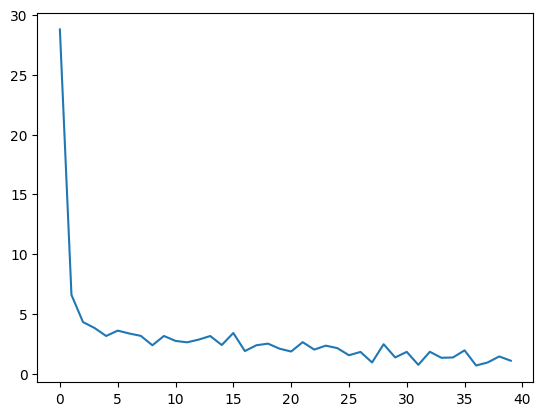

In [11]:
plt.plot(loss_list)

### why average loss
When training a model, it's common to calculate the average loss over a batch of samples rather than the individual loss values for each sample. Averaging the loss provides a more stable and smoother estimate of the model's performance, which is important when updating the model's parameters during training.

Here are some reasons why using average loss is beneficial:

1. **Noise reduction**: Individual loss values can be noisy due to variations in the training data. Averaging the loss over a batch helps to reduce the impact of this noise on the model's updates, leading to more stable and reliable convergence.

2. **Gradient stability**: During backpropagation, the gradients are calculated with respect to the loss. Averaging the loss stabilizes the gradients, preventing large gradients that could cause the model's updates to overshoot the optimal parameter values.

3. **Monitoring and logging**: Averaging the loss helps to keep the training progress more interpretable, as it's easier to understand and compare the average loss values across different iterations, epochs, or batches.

4. **Hyperparameter tuning**: Average loss values are often used for hyperparameter tuning, such as selecting the best learning rate, as they provide a more reliable estimate of the model's performance than individual loss values.

In summary, using the average loss during training leads to more stable and reliable model updates, which in turn can improve the model's overall performance and convergence speed.


### backward
The `avg_loss.backward()` function call is a part of the training process in PyTorch, and it calculates the gradients of the average loss with respect to the model's parameters. This step is essential for updating the model's weights during the optimization process.

Here's a brief explanation of what happens during the `avg_loss.backward()` call:

1. The `backward()` function computes the gradients of the loss with respect to each parameter (i.e., the partial derivatives of the loss function with respect to each parameter) using the chain rule and backpropagation algorithm.

2. These gradients are stored in the `.grad` attribute of each model parameter (e.g., `model.fc1.weight.grad`).

3. After the gradients are computed, the optimizer (e.g., SGD) uses them to update the model's parameters during the `opt.step()` call. This step moves the parameters in the direction of the negative gradient to minimize the loss.

4. Finally, the `opt.zero_grad()` function call is used to clear the gradients after each optimization step, ensuring that the gradients from the previous step do not accumulate and interfere with the gradients of the next step.

In summary, the `avg_loss.backward()` function call calculates the gradients of the average loss with respect to the model's parameters, which are then used by the optimizer to update the model's weights during training.

### step by step of training process
Here is a step-by-step explanation of the training process in deep learning, including defining the model, forward pass, loss calculation, backward pass, and gradient update:

1. **Define the model**: Create a neural network model by defining its architecture, including the number of layers, types of layers, and activation functions. In PyTorch, you typically subclass `nn.Module` and implement the `__init__()` and `forward()` methods.

```python
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
```

2. **Forward pass**: Pass the input data through the model to obtain predictions. This process involves applying the model's layers and activation functions in sequence, as defined in the `forward()` method.

```python
model = MyModel()
predictions = model(inputs)
```

3. **Calculate the loss**: Compute the loss (or objective) function, which measures the difference between the model's predictions and the target (ground truth) values. The goal is to minimize this loss during training.

```python
loss_function = nn.CrossEntropyLoss()
loss = loss_function(predictions, targets)
```

4. **Backward pass**: Perform backpropagation to calculate the gradients of the loss with respect to each model parameter. The gradients indicate the direction in which the parameters should be updated to minimize the loss.

```python
loss.backward()
```

5. **Gradient update**: Update the model's parameters using an optimization algorithm, such as Stochastic Gradient Descent (SGD) or Adam. The optimizer adjusts the parameters based on their gradients, with the goal of minimizing the loss.

```python
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optimizer.step()
```

6. **Clear gradients**: Reset the gradients after each update to prevent them from accumulating and interfering with subsequent gradient calculations.

```python
optimizer.zero_grad()
```

These steps are typically performed in a loop over multiple epochs and batches of data, continuously updating the model's parameters to minimize the loss and improve the model's performance.

### Backpropagation
Backpropagation, short for "backward propagation of errors," is an essential algorithm in the training process of artificial neural networks. It is used to calculate the gradients of the loss function with respect to each model parameter, which are then used to update the model's parameters during optimization. The backpropagation algorithm is based on the chain rule from calculus, which allows efficient computation of partial derivatives in a layered structure, like a neural network.

Here's a high-level overview of the backpropagation algorithm:

1. **Forward pass**: Pass the input data through the neural network to obtain the predictions. This involves applying the layers and activation functions in sequence, as defined by the model.

2. **Compute the loss**: Calculate the loss (or error) using the model's predictions and the ground truth (target) values. The goal is to minimize this loss during training.

3. **Backward pass**: Starting from the output layer and moving backward through the network, calculate the gradients of the loss with respect to each parameter (i.e., the partial derivatives of the loss function with respect to each weight and bias). This is done using the chain rule, which allows efficient computation of these gradients.

4. **Update parameters**: Use an optimization algorithm, such as Stochastic Gradient Descent (SGD) or Adam, to update the model's parameters based on the calculated gradients. The optimizer adjusts the parameters in the direction of the negative gradient to minimize the loss.

Backpropagation allows efficient and precise gradient calculation in deep neural networks, enabling them to learn complex patterns and representations from data. The backpropagation algorithm, combined with gradient-based optimization methods, forms the foundation of modern deep learning.

In [12]:
class MNISTCOV(nn.Module):
    def __init__(self):
        super(MNISTCOV,self).__init__()

        #define convolution layer
        self.conv1=nn.Conv2d(in_channels=1,out_channels=20,kernel_size=5,stride=1,padding=2)
        self.max_pool1=nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2=nn.Conv2d(in_channels=20,out_channels=20,kernel_size=5,stride=1,padding=2)
        self.max_pool2=nn.MaxPool2d(kernel_size=2,stride=2)
        self.fc=nn.Linear(in_features=980,out_features=1)

    def forward(self,inputs):
        x=self.conv1(inputs)
        #relu activation
        x=F.relu(x)
        x=self.max_pool1(x)
        x=self.conv2(x)
        x=F.relu(x)
        x=self.max_pool2(x)
        x=torch.flatten(x, start_dim=1)
        x=self.fc(x)
        return x

In [13]:
model=MNISTCOV()
params_info = summary(model, (1, 28, 28))
print(params_info)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 28, 28]             520
         MaxPool2d-2           [-1, 20, 14, 14]               0
            Conv2d-3           [-1, 20, 14, 14]          10,020
         MaxPool2d-4             [-1, 20, 7, 7]               0
            Linear-5                    [-1, 1]             981
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.19
Params size (MB): 0.04
Estimated Total Size (MB): 0.23
----------------------------------------------------------------
None


In [14]:
def train(model):
    model.train()

    optimizer=torch.optim.SGD(model.parameters(), lr=0.01)

    epoch_num=10
    loss_list=[]

    for epoch in range(epoch_num):
        for batch, data in enumerate(train_loader):
            images,labels=data
            labels=labels.float()
            predicts=model(images)
            loss=F.mse_loss(predicts,labels.unsqueeze(-1))
            avg_loss=torch.mean(loss)

            if batch%200==0:
                loss_list.append(avg_loss.item())
                print("epoch: {}, batch: {}, loss is: {}".format(epoch,batch,avg_loss))

            avg_loss.backward()
            optimizer.step()
            optimizer.zero_grad()
    torch.save(model.state_dict(),'ministscovigmoid.pth')
    return loss_list

In [15]:
model = MNISTCOV()
loss_list_conv = train(model)

epoch: 0, batch: 0, loss is: 26.17452621459961
epoch: 0, batch: 200, loss is: 4.5962419509887695
epoch: 0, batch: 400, loss is: 2.6410255432128906
epoch: 0, batch: 600, loss is: 2.7069239616394043
epoch: 1, batch: 0, loss is: 3.318444013595581
epoch: 1, batch: 200, loss is: 1.8399854898452759
epoch: 1, batch: 400, loss is: 1.6452938318252563
epoch: 1, batch: 600, loss is: 0.9590991139411926
epoch: 2, batch: 0, loss is: 1.6344696283340454
epoch: 2, batch: 200, loss is: 1.1835346221923828
epoch: 2, batch: 400, loss is: 0.855150580406189
epoch: 2, batch: 600, loss is: 1.392245888710022
epoch: 3, batch: 0, loss is: 1.0084147453308105
epoch: 3, batch: 200, loss is: 0.7872023582458496
epoch: 3, batch: 400, loss is: 1.653586745262146
epoch: 3, batch: 600, loss is: 0.9037806987762451
epoch: 4, batch: 0, loss is: 1.5789263248443604
epoch: 4, batch: 200, loss is: 0.5085340738296509
epoch: 4, batch: 400, loss is: 1.394525170326233
epoch: 4, batch: 600, loss is: 0.7363105416297913
epoch: 5, batch:

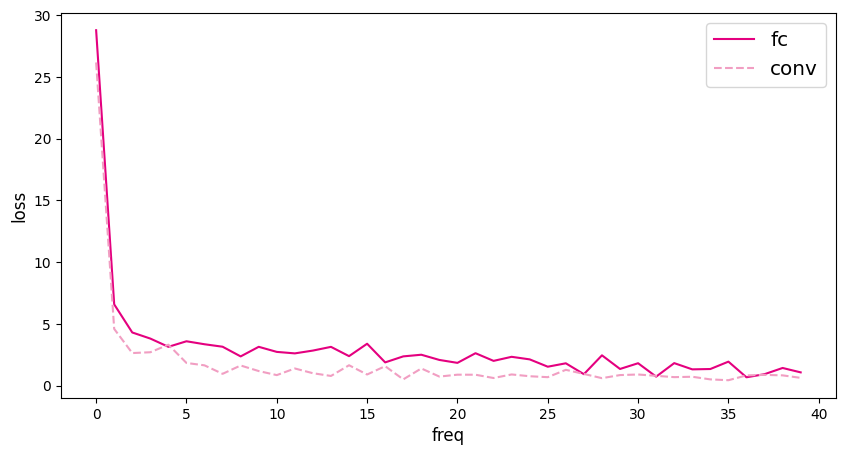

In [17]:
def plot_two_losses(loss_list_1, loss_list_2):
    plt.figure(figsize=(10,5))
    
    freqs = [i for i in range(len(loss_list_1))]

    # 绘制训练损失变化曲线
    plt.plot(freqs, loss_list_1, color='#e4007f', label="fc")
    plt.plot(freqs, loss_list_2, color='#f19ec2', linestyle='--', label="conv")
    
    # 绘制坐标轴和图例
    plt.ylabel("loss", fontsize='large')
    plt.xlabel("freq", fontsize='large')
    plt.legend(loc='upper right', fontsize='x-large')
    
    plt.show()

plot_two_losses(loss_list, loss_list_conv)

### Build cnn
In a convolutional neural network (CNN), the primary building blocks are convolutional layers and pooling layers. I'll provide a brief explanation of these concepts and how to define a convolutional model.

1. Convolutional layers: These layers apply a set of filters (also called kernels) to the input data to learn spatial features. The filters slide across the input data and perform element-wise multiplication followed by a summation. The output of this operation forms a new feature map.

    - In_channels: The number of channels in the input data. For a grayscale image, it's 1, and for an RGB image, it's 3.
    - Out_channels: The number of filters or kernels applied to the input data. This determines the number of feature maps in the output.
    - Kernel size: The size (height x width) of the filter. Common sizes are 3x3 and 5x5.
    - Stride: The number of pixels the filter moves while sliding across the input data. A stride of 1 means the filter moves one pixel at a time.
    - Padding: The number of pixels added to the input data's border. This is used to control the spatial size of the output feature maps. Padding can be 'same' (output size equals input size) or 'valid' (no padding).

2. Max pooling layers: These layers are used to reduce the spatial dimensions of the feature maps. They slide a window across the input feature maps and select the maximum value in that window.

    - Kernel size: The size (height x width) of the pooling window. Common sizes are 2x2 and 3x3.
    - Stride: The number of pixels the window moves while sliding across the input data.


### what will change when change the parameters
Changing the out_channels, kernel size, or stride in a convolutional layer can affect the model in several ways:

1. Out_channels: If you increase the number of output channels, the model will have more filters or kernels, resulting in more feature maps in the output. This can help the model learn more complex features, but at the cost of increased computational complexity and memory usage. Conversely, if you decrease the number of output channels, the model will have fewer filters and feature maps, which can reduce the complexity and memory usage but may lead to poorer performance if the model cannot learn sufficient features.

2. Kernel size: Increasing the kernel size means the filters will cover a larger area of the input data, allowing the model to learn more global features. However, larger kernel sizes can also increase the computational complexity and memory usage. Smaller kernel sizes, on the other hand, allow the model to learn more local features, which may be useful for fine-grained details. There is a trade-off between the size of the kernel and the ability to capture different levels of detail in the input data.

3. Stride: A larger stride means the filter moves faster across the input data, resulting in a smaller spatial size of the output feature maps. This can lead to faster computation and reduced memory usage, but it may also cause the model to miss some important features in the input data. Smaller strides allow the model to capture more details from the input data but can increase the computational complexity and memory usage.

In summary, changing these parameters can affect the model's capacity to learn features, its computational complexity, and memory usage. There is no one-size-fits-all solution, and the optimal values for these parameters depend on the specific problem and dataset. It's common to experiment with different combinations of these parameters and use validation data to find the best configuration.

### The choice of network Layer
The choice of network layers (Convolutional, Linear, or Fully Connected) depends on the type of problem you are trying to solve and the input data's nature. Here are some guidelines to help you decide:

1. Convolutional layers (Conv): Convolutional layers are ideal for processing grid-like data, such as images or time-series data, where spatial or temporal locality is important. They excel at learning spatial hierarchies of features, which makes them suitable for tasks like image recognition, object detection, and segmentation. If your input data is an image or has a spatial or temporal structure, convolutional layers should be your first choice.

2. Linear (Dense) or Fully Connected (FC) layers: Linear or fully connected layers are used for processing non-grid-like data, such as tabular data or when the spatial structure of the data is not important. They are commonly used in the later stages of a neural network, after convolutional layers, to aggregate the learned features and produce the final output. You can also use them in networks without convolutional layers for tasks like regression, classification, or processing structured data.

To build an effective neural network, you usually combine different types of layers. For example, a common architecture for image recognition tasks is a series of convolutional layers followed by pooling layers, and then one or more fully connected layers at the end to produce the final output.

When selecting layers, consider the following:

- Start with a simple architecture and gradually add complexity if needed. Adding too many layers or making the network too complex initially can lead to overfitting or longer training times.
- Use existing research or pre-trained models as a starting point. Many state-of-the-art architectures have been developed for different tasks, such as ResNet or VGG for image recognition or BERT for natural language processing. These architectures can be adapted or fine-tuned for your specific problem.
- Experiment with different architectures and layer configurations, and use validation data to determine which one works best for your problem. There is no one-size-fits-all solution, and finding the optimal architecture often requires trial and error.

### Select appropriate Loss Funtion
Selecting the appropriate loss function for a machine learning problem depends on the task, the nature of the target variable, and the model being used. The loss function measures the difference between the model's predictions and the actual target values. During training, the model aims to minimize this difference.

Here are some common loss functions:

1. Mean Squared Error (MSE): This loss function is commonly used for **regression tasks**, where the target variable is continuous. It calculates the average of the squared differences between the predicted and actual values. It is sensitive to outliers, as the squared differences can become large.

2. Mean Absolute Error (MAE): Also used for **regression** tasks, MAE calculates the average of the absolute differences between the predicted and actual values. It is less sensitive to outliers compared to MSE.

3. Cross-Entropy Loss (Log Loss): This loss function is used for **binary or multi-class classification** problems, where the target variable is categorical. It measures the difference between the predicted probabilities and the actual probabilities (or one-hot encoded labels) of each class. It is commonly used with models that output probabilities, such as logistic regression or neural networks with softmax activation in the output layer.

4. Hinge Loss: This loss function is used for **binary classification** problems, particularly with Support Vector Machines (SVMs). It measures the margin between the predicted class and the actual class. The goal is to maximize the margin between classes.

5. Categorical Cross-Entropy Loss: This is a variant of cross-entropy loss used for **multi-class classification** problems when the output is a probability distribution over classes. It is commonly used with softmax activation in the output layer of a neural network.

When selecting a loss function, consider the following:

- Match the loss function to the task: Use regression loss functions (e.g., MSE, MAE) for regression problems, and classification loss functions (e.g., cross-entropy, hinge) for classification problems.
- Robustness to outliers: If your data contains outliers or noise, consider using a loss function that is less sensitive to extreme values, like MAE for regression tasks.
- Model compatibility: Some loss functions work better with specific models. For example, hinge loss is commonly used with SVMs, and cross-entropy loss is often used with neural networks for classification tasks.

Ultimately, the choice of loss function depends on the specific problem and dataset. You may need to experiment with different loss functions and evaluate their performance on validation data to find the best one for your task.

In [38]:
class MNIST(nn.Module):
    def __init__(self):
        super(MNIST, self).__init__()

        self.fc1=nn.Linear(in_features=784, out_features=128)
        #self.fc2=nn.Linear(in_features=256,out_features=128)
        self.fc2=nn.Linear(in_features=128,out_features=10)

    def forward(self,inputs):
        inputs=inputs.reshape(inputs.shape[0], 784)
        output1=self.fc1(inputs)
        output1=torch.sigmoid(output1)
        output2=self.fc2(output1)
        #output2=torch.sigmoid(output2)
        #finals=self.fc3(output2)

        return output2



In [45]:
def trainlr(model):
    model.train()

    #optimizer=torch.optim.SGD(model.parameters(),lr=0.001)
    #optimizer=torch.optim.SGD(model.parameters(),lr=0.0001)
    optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

    epoch_num=10
    loss_list=[]

    for epoch in range(epoch_num):
        for batch, data in enumerate(train_loader):
            images,labels=data
            labels=labels.long()

        
            predicts=model(images)
            loss=F.cross_entropy(predicts,labels)
            avg_loss=torch.mean(loss)

            if batch%200 ==0:
                loss=avg_loss.item()
                loss_list.append(loss)
                print("epoch: {}, batch: {}, loss is: {}".format(epoch,batch,avg_loss))

            avg_loss.backward()
            optimizer.step()
            optimizer.zero_grad()


    #torch.save(model.state_dict(),"something.pth")
    return loss_list

In [46]:
model=MNIST()
loss_list=trainlr(model)

epoch: 0, batch: 0, loss is: 2.3128156661987305
epoch: 0, batch: 200, loss is: 2.255539655685425
epoch: 0, batch: 400, loss is: 2.1922271251678467
epoch: 0, batch: 600, loss is: 2.144777536392212
epoch: 1, batch: 0, loss is: 2.0146217346191406
epoch: 1, batch: 200, loss is: 1.8735946416854858
epoch: 1, batch: 400, loss is: 1.7228721380233765
epoch: 1, batch: 600, loss is: 1.606842041015625
epoch: 2, batch: 0, loss is: 1.6148055791854858
epoch: 2, batch: 200, loss is: 1.4782509803771973
epoch: 2, batch: 400, loss is: 1.1881920099258423
epoch: 2, batch: 600, loss is: 1.1885126829147339
epoch: 3, batch: 0, loss is: 1.1843323707580566
epoch: 3, batch: 200, loss is: 1.053436517715454
epoch: 3, batch: 400, loss is: 1.0077128410339355
epoch: 3, batch: 600, loss is: 0.8481021523475647
epoch: 4, batch: 0, loss is: 0.8398833870887756
epoch: 4, batch: 200, loss is: 0.813543975353241
epoch: 4, batch: 400, loss is: 0.8046470284461975
epoch: 4, batch: 600, loss is: 0.7402121424674988
epoch: 5, batch

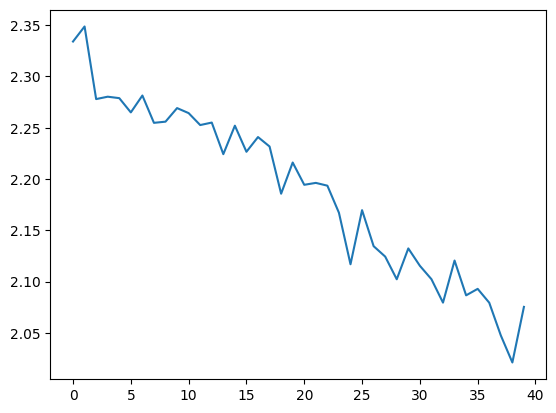

In [41]:
plt.plot(loss_list)

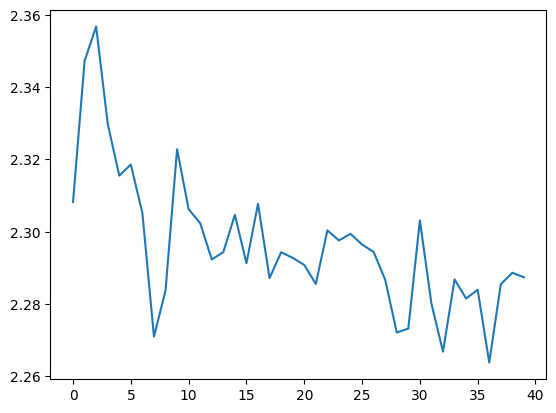

In [44]:
plt.plot(loss_list)

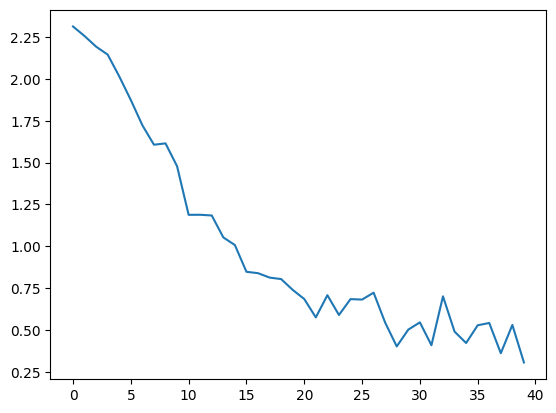

In [47]:
plt.plot(loss_list)

### Learning rate
Learning rate is a crucial hyperparameter in machine learning, particularly in the context of optimization algorithms used to train models. It determines the step size at which the model updates its weights during the training process. The learning rate directly impacts the convergence, speed, and stability of the training process.

In gradient-based optimization methods, such as gradient descent and its variants (e.g., stochastic gradient descent, Adam, etc.), the learning rate controls how much the model's weights are adjusted at each iteration with respect to the gradient of the loss function. A smaller learning rate results in smaller weight updates, while a larger learning rate leads to bigger updates.

When you change the learning rate, you can influence the training process in the following ways:

1. If the learning rate is too high, the model may overshoot the optimal weights, leading to unstable training and divergence. The model might fail to converge or may oscillate around the optimal solution.
2. If the learning rate is too low, the model will take a longer time to converge, as the weight updates are very small. This may result in slow training, and the model might get stuck in a local minimum instead of reaching the global minimum.
3. If the learning rate is set appropriately, the model can converge to the optimal solution at a reasonable speed without oscillating or getting stuck in local minima.

Selecting an optimal learning rate is often an empirical process, requiring experimentation and tuning. Techniques like learning rate schedules, adaptive learning rates, or learning rate annealing can be employed to adjust the learning rate during training, helping to strike a balance between stability and speed of convergence.

In [52]:
def trainoptim(model):
    model.train()

    #optimizer=torch.optim.Adagrad(model.parameters(), lr=0.01)
    #optimizer=torch.optim.Adam(model.parameters(), lr=0.01)
    #optimizer=torch.optim.SGD(model.parameters(), lr=0.01)
    #optimizer=torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9 )
    optimizer=torch.optim.RMSprop(model.parameters(), lr=0.01)

    epoch_num= 5
    for epoch in range(epoch_num):
        for batch, data in enumerate(train_loader):
            images,labels=data
            #labels=labels.long()

            predicts=model(images)

            loss=F.cross_entropy(predicts,labels)
            avg_loss=torch.mean(loss)

            if batch%200==0:
                 print("epoch: {}, batch: {}, loss is: {}".format(epoch,batch,avg_loss))

        avg_loss.backward()
        optimizer.step()
        optimizer.zero_grad()


    #torch.save(model.state_dict(),"something.pth")
    return loss_list
model=MNIST()
loss_list=trainoptim(model)

epoch: 0, batch: 0, loss is: 2.305487632751465
epoch: 0, batch: 200, loss is: 2.312544584274292
epoch: 0, batch: 400, loss is: 2.3141090869903564
epoch: 0, batch: 600, loss is: 2.312288761138916
epoch: 1, batch: 0, loss is: 7.75353479385376
epoch: 1, batch: 200, loss is: 7.902790546417236
epoch: 1, batch: 400, loss is: 9.486916542053223
epoch: 1, batch: 600, loss is: 9.49841022491455
epoch: 2, batch: 0, loss is: 2.622083902359009
epoch: 2, batch: 200, loss is: 2.394317388534546
epoch: 2, batch: 400, loss is: 2.3756909370422363
epoch: 2, batch: 600, loss is: 2.441784381866455
epoch: 3, batch: 0, loss is: 2.198082447052002
epoch: 3, batch: 200, loss is: 2.296300172805786
epoch: 3, batch: 400, loss is: 2.2497754096984863
epoch: 3, batch: 600, loss is: 2.1687355041503906
epoch: 4, batch: 0, loss is: 2.081209182739258
epoch: 4, batch: 200, loss is: 2.216193675994873
epoch: 4, batch: 400, loss is: 2.280141592025757
epoch: 4, batch: 600, loss is: 2.191331386566162


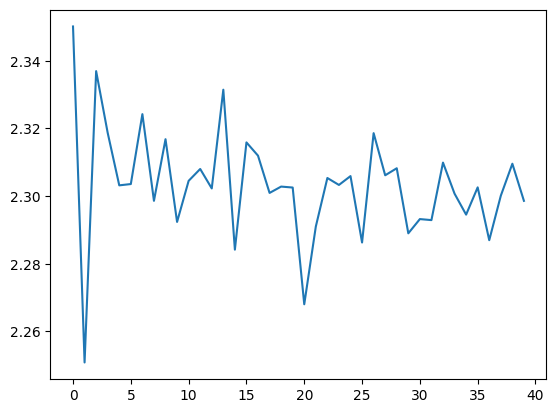

In [30]:
plt.plot(loss_list)

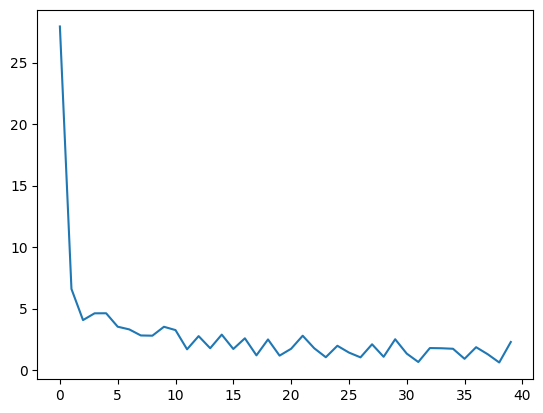

In [22]:
plt.plot(loss_list)

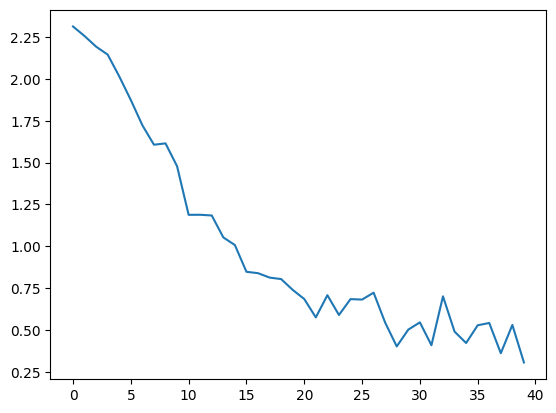

In [49]:
plt.plot(loss_list)

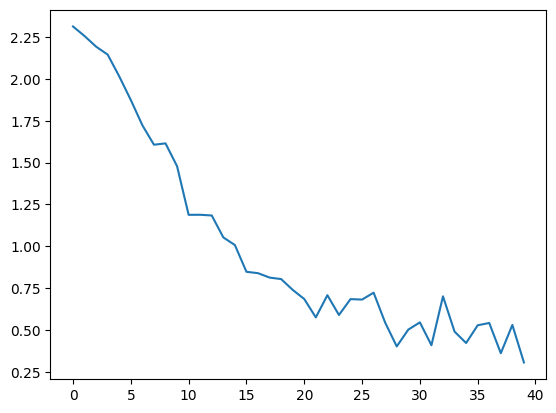

In [51]:
plt.plot(loss_list)

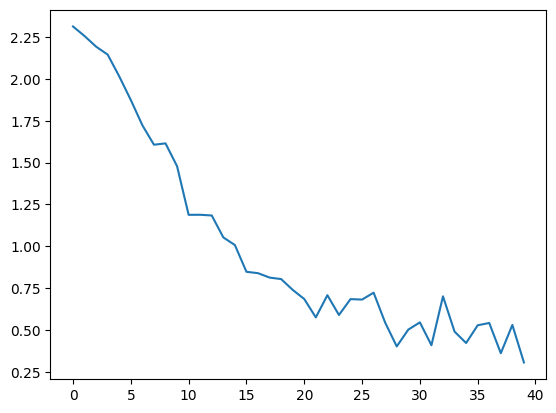

In [53]:
plt.plot(loss_list)

### Common Optimizers
Here's an introduction to some mainstream optimizers used in machine learning, along with their theoretical basis, advantages, disadvantages, and suitable applications:

1. Gradient Descent (GD):

- Theoretical basis: Gradient Descent is based on iteratively minimizing a loss function by updating the model's parameters in the opposite direction of the gradient.
- Advantages: Simplicity and ease of implementation.
- Disadvantages: Slow convergence and susceptibility to getting stuck in local minima (for non-convex functions).
- Suitable applications: Simple linear regression or logistic regression models.
- PyTorch expression: To implement basic Gradient Descent, you can use `torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.0)` optimizer with a batch size equal to the entire dataset during training.

2. Stochastic Gradient Descent (SGD):

- Theoretical basis: A variant of Gradient Descent, SGD approximates the gradient using a single training example, rather than the entire dataset.
- Advantages: Faster convergence than GD and better at avoiding local minima due to its inherent noise.
- Disadvantages: High variance in parameter updates, leading to oscillations and potentially slower convergence to the optimum.
- Suitable applications: Large-scale machine learning tasks, such as deep learning.
- PyTorch expression: `torch.optim.SGD(model.parameters(), lr=learning_rate)`

3. Mini-batch Gradient Descent (MBGD):

- Theoretical basis: A compromise between GD and SGD, MBGD calculates the gradient using a subset (or mini-batch) of training examples.
- Advantages: Faster convergence than GD, with reduced variance compared to SGD.
- Disadvantages: Less noise than SGD, which could result in getting stuck in local minima or plateaus.
- Suitable applications: General-purpose optimization for machine learning tasks.
- PyTorch expression: The same expression as for SGD is used, but the dataset is divided into mini-batches during training.

4. Momentum:

- Theoretical basis: A modification of SGD that incorporates a momentum term, which helps to accelerate convergence and dampen oscillations.
- Advantages: Faster convergence and reduced oscillations compared to standard SGD.
- Disadvantages: Additional hyperparameter (momentum coefficient) to tune.
- Suitable applications: Deep learning and other large-scale machine learning tasks.
- PyTorch expression: `torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum_coefficient)`
- The momentum coefficient (also known as the momentum term or momentum factor) is a hyperparameter that controls the degree of momentum in the optimization algorithm. It is used in optimization methods like Momentum-based Stochastic Gradient Descent (SGD) to accelerate convergence and reduce oscillations.
    - A momentum coefficient close to 0 reduces the influence of momentum, making the optimization algorithm behave more like standard SGD without momentum.
    - A higher momentum coefficient (e.g., 0.9) increases the momentum's influence, helping the optimization algorithm accelerate convergence and dampen oscillations. However, if the momentum coefficient is set too high, it may cause the optimizer to overshoot the optimal solution or make it harder to converge.

5. Adaptive Moment Estimation (Adam):

- Theoretical basis: A combination of adaptive learning rates (similar to AdaGrad and RMSProp) and momentum, Adam computes individual learning rates for each parameter.
- Advantages: Efficient and adaptive optimization, suitable for noisy and sparse gradients, requires less tuning of the learning rate.
- Disadvantages: May exhibit convergence issues in some cases and can sometimes result in a suboptimal solution.
- Suitable applications: Deep learning, natural language processing, and computer vision tasks.
- PyTorch expression: `torch.optim.Adam(model.parameters(), lr=learning_rate)`

6. Adagrad:

- Theoretical basis: Adagrad adapts the learning rate for each parameter based on the historical gradients, making it suitable for sparse data.
- Advantages: Automatically adapts learning rates, works well with sparse data and features.
- Disadvantages: Accumulation of the squared gradients may cause the learning rate to become too small, leading to slow convergence.
- Suitable applications: Natural language processing and other tasks with sparse features.
- PyTorch expression: `torch.optim.Adagrad(model.parameters(), lr=learning_rate)`

7. RMSProp:

- Theoretical basis: RMSProp is an improvement over Adagrad, where it uses an exponentially decaying average of past gradients to update the learning rate.
- Advantages: Addresses Adagrad's diminishing learning rates issue, allowing for more robust and faster convergence.
- Disadvantages: Requires tuning of the decay rate hyperparameter.
- Suitable applications: Deep learning and recurrent neural networks.
- PyTorch expression: `torch.optim.RMSprop(model.parameters(), lr=learning_rate, alpha=decay_rate)`


These are just a few of the many optimization algorithms used in machine learning. Choosing the right optimizer for a given task depends on factors like the problem's complexity, the size of the dataset, and the model's architecture. It's essential to experiment with different optimizers to find the best one for your specific application.



### Fine Tune

Grid search and other hyperparameter tuning techniques are methods used to find the best hyperparameters for a machine learning model. Hyperparameters are the parameters of the learning algorithm itself and are not learned during the training process. Examples of hyperparameters include learning rate, batch size, momentum coefficient, and regularization terms.

1. Grid search:
Grid search is a simple, brute-force method for hyperparameter tuning. It involves exhaustively trying all possible combinations of hyperparameter values within a predefined search space. For each combination, the model is trained and evaluated on a validation set, and the best performing combination of hyperparameters is selected. Although grid search can be computationally expensive, it is easy to implement and guarantees finding the optimal combination within the search space.

2. Other hyperparameter tuning techniques:

a. Random search:
Instead of trying all possible combinations of hyperparameters like grid search, random search samples a random subset of the hyperparameter space. It can be more efficient than grid search, especially when dealing with a large number of hyperparameters or continuous hyperparameter values.

b. Bayesian optimization:
Bayesian optimization is a more sophisticated technique that models the hyperparameter space as a probability distribution. It uses previous evaluations of the model to update this distribution and select the next hyperparameters to try. This allows the algorithm to focus on more promising regions of the search space, making it more efficient than grid search or random search.

c. Genetic algorithms:
Genetic algorithms are inspired by the process of natural selection and involve evolving a population of candidate solutions (i.e., hyperparameter combinations) over several generations. At each generation, the best-performing candidates are selected, combined, and mutated to produce the next generation. This method can efficiently explore a large search space and find near-optimal hyperparameter combinations.

d. Coordinate descent:
In coordinate descent, one hyperparameter is optimized at a time while keeping the others fixed. This process is repeated iteratively for all hyperparameters until convergence. It is less computationally expensive than grid search but may not find the global optimum in some cases.

e. Tree-structured Parzen Estimators (TPE):
TPE is another probabilistic approach to hyperparameter tuning that uses a non-parametric density estimator to model the relationship between hyperparameters and the target performance metric. It can be more efficient than grid search or random search in finding the best hyperparameter combination.

These are just a few examples of the many techniques available for hyperparameter tuning. The choice of method depends on factors like the problem's complexity, the size of the search space, and the available computational resources. In practice, it's common to start with simple methods like grid search or random search and then move on to more advanced techniques if needed.

In [55]:
model=MNIST()

for name, param in model.named_parameters():
    print(name,param)

state_dict=model.state_dict()
print(state_dict.keys())

print("fc1.weight:", state_dict['fc1.weight'])

fc1.weight Parameter containing:
tensor([[ 0.0344,  0.0348,  0.0153,  ..., -0.0305,  0.0033,  0.0143],
        [-0.0161, -0.0011, -0.0132,  ...,  0.0216,  0.0135, -0.0281],
        [ 0.0185, -0.0268, -0.0306,  ..., -0.0235, -0.0272, -0.0331],
        ...,
        [ 0.0244, -0.0126, -0.0093,  ...,  0.0247, -0.0047,  0.0077],
        [-0.0225, -0.0309,  0.0250,  ..., -0.0210, -0.0216, -0.0303],
        [-0.0176, -0.0235,  0.0210,  ..., -0.0054,  0.0168, -0.0154]],
       requires_grad=True)
fc1.bias Parameter containing:
tensor([ 5.3003e-03, -2.2558e-02, -1.8487e-02, -3.2571e-02, -2.6155e-02,
         2.2290e-02,  2.8155e-02,  6.5863e-05, -2.9545e-03, -1.8066e-02,
        -6.0788e-03, -7.5366e-03, -1.6712e-02, -1.4022e-03,  1.8703e-02,
         2.7520e-02, -2.6927e-02,  1.0652e-02, -1.9406e-02,  2.6717e-02,
        -1.1795e-02, -1.0785e-02,  2.5167e-02, -3.1487e-02, -1.5375e-02,
        -2.3336e-02, -3.4763e-03, -2.9832e-03, -3.5052e-02, -1.6709e-02,
         1.6298e-02, -9.4460e-03, -1.

In [56]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(10, 20)
        self.fc2 = nn.Linear(20, 30)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

model = SimpleNet()

# Print weights and biases of fc1 layer
print("FC1 weights:", model.fc1.weight)
print("FC1 biases:", model.fc1.bias)

# Print weights and biases of fc2 layer
print("FC2 weights:", model.fc2.weight)
print("FC2 biases:", model.fc2.bias)


FC1 weights: Parameter containing:
tensor([[-0.1763, -0.3016,  0.2590,  0.0605, -0.1125,  0.1955,  0.0212,  0.2391,
          0.0391, -0.2825],
        [-0.1907, -0.2451,  0.0878, -0.2265,  0.0283, -0.0387, -0.3112, -0.2180,
         -0.0726, -0.1020],
        [-0.0305, -0.1894,  0.1396, -0.2157, -0.1886, -0.0924, -0.1608,  0.0625,
         -0.0492,  0.0881],
        [-0.1687,  0.2145,  0.2482, -0.1672,  0.0481,  0.0941, -0.1363,  0.1957,
         -0.2696, -0.3131],
        [ 0.1266,  0.1589,  0.0455, -0.2019, -0.2251,  0.2056, -0.2712,  0.0463,
         -0.2706,  0.2505],
        [-0.0256, -0.0256,  0.2165,  0.2156,  0.1177,  0.0875,  0.1357,  0.1249,
         -0.2538, -0.0060],
        [-0.3115, -0.1218, -0.2754,  0.0575, -0.2949,  0.1436,  0.1974, -0.1423,
         -0.2995,  0.2715],
        [-0.3149,  0.0429,  0.2789, -0.2771,  0.0659, -0.2146, -0.2888, -0.0561,
          0.0689,  0.0753],
        [ 0.0066, -0.0404,  0.1361, -0.1733,  0.0436,  0.1512,  0.1180, -0.1080,
          0.

In [ ]:
import torch
import torch.nn as nn

class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()

        self.conv1 = nn.Conv2d(3, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        # Initialize weights and biases
        nn.init.kaiming_uniform_(self.conv1.weight, nonlinearity='relu')
        nn.init.constant_(self.conv1.bias, 0)

        nn.init.xavier_normal_(self.fc1.weight)
        nn.init.constant_(self.fc1.bias, 0)

        nn.init.xavier_normal_(self.fc2.weight)
        nn.init.constant_(self.fc2.bias, 0)

        nn.init.xavier_normal_(self.fc3.weight)
        nn.init.constant_(self.fc3.bias, 0)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 16 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

The difference between the mentioned initialization functions lies in the distribution they use for initializing the weights and the purpose they serve in the context of neural networks. Here's a brief overview of each:

1. `init.kaiming_uniform_`: Also known as He uniform initialization. It initializes the weights of the layer with values drawn from a uniform distribution within the range `[-limit, limit]`, where `limit = sqrt(6 / fan_in)`. This initialization is designed for ReLU activation functions and their variants.

2. `init.kaiming_normal_`: Also known as He normal initialization. It initializes the weights of the layer with values drawn from a normal distribution with a mean of 0 and a standard deviation of `sqrt(2 / fan_in)`. Like `init.kaiming_uniform_`, it is designed for ReLU activation functions and their variants. 

方法来自Kaiming He，Xiangyu Zhang，Shaoqing Ren 和 Jian Sun所写的论文: Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification。这是一个鲁棒性特别强的初始化方法，并且适应了非线性激活函数（rectifier nonlinearities）。

3. `init.xavier_normal_`: Also known as Glorot normal initialization. It initializes the weights of the layer with values drawn from a normal distribution with a mean of 0 and a standard deviation of `sqrt(2 / (fan_in + fan_out))`. This initialization is designed for the sigmoid and hyperbolic tangent (tanh) activation functions.

4. `init.constant_`: Initializes the weights (or biases) of the layer with a constant value. This is usually used for biases, where it is common to set them to zero initially.

To use these initializations when creating a neural network, you can apply them to the `weight` and `bias` attributes of a layer after it is defined. Here's an example of customizing the initial weights and biases of a simple neural network:


In [ ]:
linear_layer = nn.Linear(in_features=784, out_features=128)

# Initialize the weights with Xavier uniform initialization
nn.init.xavier_uniform_(linear_layer.weight)

# Initialize the biases with zeros
nn.init.zeros_(linear_layer.bias)

#customize weight

linear_layer.weight.data=weight_attributes
#model.fc1.weight.data=weight_attributes
#model.fc1.bias.data=bias_attributes
